In [6]:
import argparse
import pickle
import re
from datetime import datetime, timedelta
from itertools import chain, tee
from os import environ, makedirs, path
from localtileserver import get_leaflet_tile_layer, TileClient

import eccodes
import pdbufr
import numpy as np
import pandas as pd
import xarray as xr
import rasterio
import rioxarray
import ipyleaflet
from scipy.optimize import root_scalar
from scipy.spatial import KDTree
from matplotlib import pyplot

from tracks_utils import *

import warnings
warnings.filterwarnings("ignore")

In [7]:
df_storms = create_storms_df()
print(df_storms.stormIdentifier.unique())
df_storm = df_storms[df_storms.stormIdentifier == '08L']

['08L' '10E' '10L']


In [8]:
strike_map_xr, tif_path = strike_probability_map(df_storm)
tif_path

'data/pts_raster.tif'

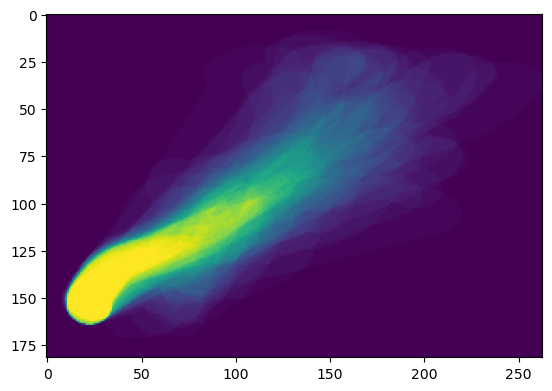

In [9]:
src = rasterio.open(tif_path)
pyplot.imshow(src.read(1))
pyplot.show()

In [10]:
client = TileClient(src)
t = get_leaflet_tile_layer(client, opacity = 0.7, palette = "viridis", n_colors = 10)

In [12]:
m = ipyleaflet.Map(center=(df_storm.lat[0], df_storm.lon[0]), zoom=3)
m.add_layer(t)
m.add_control(ipyleaflet.LayersControl())
display(m)

Map(center=[29.0, -71.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…